# 7 - Data visualization and an introduction to clustering

In this notebook we will see for the first time some techniques for data visualization and clustering, which will be useful for the assignment.

If you click on **[this](http://205.174.165.80/CICDataset/NSL-KDD/Dataset/NSL-KDD.zip)** link the download of the dataset should start.

If the link above doesn't work, follw these instructions:
- go to https://www.unb.ca/cic/datasets/nsl.html
- scroll to the end of the page, there is a link to the actual download;
- you will be redirected to another page asking for some information (there should be no check on the data you provide, so you can even fill everything with *asd* if you want);
- download the NSL-KDD.zip file

---

Regardless of the link you used for downloading the dataset, you should now have an archive named *NSL-KDD.zip*; extract it in the folder of the notebook

You should now have a directory named NSL-KDD, containing several files. You have to focus on the following ones:
- *index.html*: contains a brief description of the files, you should read it
- *KDDTrain+.txt*: the file containing the training data
- *KDDTest+.txt*: the file containing the test data

As it happened in previous sessions, you might have some troubles running this notebook on the whole dataset. If that is the case, you can use the reduced training set, which is stored in: 
- *KDDTrain+_20Percent.txt*: reduced training set

---

#### For this notebook you will need the `matplotlib` library. You can install in the same way as you installed the other libraries, e.g. scikit-learn. For instance, if you performed the installation via pip, you can do:
```
pip install matplotlib
```

---

#### Import the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Define the filename for the training data

In [2]:
TRAIN_DATA_FILENAME = 'NSL-KDD/KDDTrain+.txt'

#### Define the columns of the dataframe

In [3]:
headers = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 
    'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 
    'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 
    'dst_host_srv_rerror_rate', 'class', 'difficulty_level'
]

#### Read the file

In [4]:
train_df = pd.read_csv(TRAIN_DATA_FILENAME, names=headers)

---

<div class="alert alert-block alert-danger">
<b>Q: Display 10 random rows of the dataframe.</b>
</div>

In [5]:
train_df.sample(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty_level
50835,0,tcp,uucp_path,S0,0,0,0,0,0,0,...,0.03,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
61976,0,tcp,http,SF,232,4697,0,0,0,0,...,1.00,0.00,0.33,0.01,0.00,0.00,0.00,0.00,normal,21
104919,0,tcp,ftp_data,SF,1199,0,0,0,0,0,...,0.47,0.18,0.47,0.04,0.06,0.00,0.00,0.00,normal,21
125727,0,tcp,ftp_data,SF,7280,0,0,0,0,0,...,0.40,0.02,0.40,0.00,0.00,0.00,0.02,0.00,normal,18
11115,0,udp,domain_u,SF,45,132,0,0,0,0,...,0.66,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,20
104222,4,tcp,smtp,SF,1043,374,0,0,0,0,...,0.80,0.02,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
13147,0,tcp,private,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
879,0,tcp,http,SF,269,8921,0,0,0,0,...,1.00,0.00,0.01,0.03,0.00,0.01,0.01,0.03,normal,21
114921,0,udp,domain_u,SF,44,130,0,0,0,0,...,1.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,18
65984,0,icmp,eco_i,SF,8,0,0,0,0,0,...,1.00,0.00,1.00,0.51,0.00,0.00,0.00,0.00,ipsweep,16


---

<div class="alert alert-block alert-danger">
<b>Q: Show the columns of the dataframe</b>
</div>

In [6]:
print(train_df.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class', 'difficulty_level'],
      dtype='object')


---

<div class="alert alert-block alert-danger">
<b>Q: Print the number of rows of the dataframe</b>
</div>

In [7]:
print(len(train_df.index))

125973


---

<div class="alert alert-block alert-danger">
<b>Q: Print the number of columns of the dataframe</b>
</div>

In [8]:
print(train_df.shape[1])

43


---

<div class="alert alert-block alert-danger">
<b>Q: How many features are there in the original dataset?</b> [Be careful, not all the columns are features...]
</div>

In [9]:
print(train_df.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class', 'difficulty_level'],
      dtype='object')


<div class="alert alert-block alert-success">
From the list of columns, I have to remove "class", which tells whether a row is an attack or not and which kind of attack, and "difficulty_level", which tells how difficulty each row is supposed to be while classifying them. Thus, we have 41 features.

You can think of the features as the information that is available when collecting previously unseen data. In this case we are collecting network traffic, and we do not know in advance whether it is malicious traffic or not (that's what we might want to do!) nor the "difficulty" of it.
</div>

---

<div class="alert alert-block alert-danger">
<b>Q: Find the type of each feature (i.e. categorical, binary, numerical, etc.)</b>
</div>

<div class="alert alert-block alert-success">
    
- categorical: protocol_type, service, flag

- binary: land, logged_in, root_shell, is_host_login, is_guest_login

- numerical: duration, src_bytes, dst_bytes, wrong_fragment, urgent, hot, num_failed_logins, num_compromised, su_attempted, num_root, num_file_creations, num_shells, num_access_files, num_outbound_cmds, count, srv_count, serror_rate, srv_serror_rate, rerror_rate, srv_rerror_rate, same_srv_rate, diff_srv_rate, srv_diff_host_rate, dst_host_count, dst_host_same_srv_rate, dst_host_diff_srv_rate, ...
</div>

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
duration                       125973 non-null int64
protocol_type                  125973 non-null object
service                        125973 non-null object
flag                           125973 non-null object
src_bytes                      125973 non-null int64
dst_bytes                      125973 non-null int64
land                           125973 non-null int64
wrong_fragment                 125973 non-null int64
urgent                         125973 non-null int64
hot                            125973 non-null int64
num_failed_logins              125973 non-null int64
logged_in                      125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_root                       125973 non-null int64
num_file_creations             125973 

---

<div class="alert alert-block alert-danger">
<b>Q: How many rows are there for each unique value of "root_shell"?</b>

\[BTW, it is a binary feature. if you though it was not a binary feature go back to the previous question and focus a bit more on that!\]
</div>

In [11]:
train_df['root_shell'].value_counts()

0    125804
1       169
Name: root_shell, dtype: int64

---

<div class="alert alert-block alert-danger">
<b>Q: How many rows are there for each unique value of "logged_in"?</b>
</div>

In [12]:
train_df['logged_in'].value_counts()

0    76121
1    49852
Name: logged_in, dtype: int64

---

<div class="alert alert-block alert-danger">
<b>Q: How many rows are there for each unique value of "class"?</b>
</div>

In [13]:
train_df['class'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: class, dtype: int64

---

#### As in the previous sessions, we will now map each value of the 'class' column to 1 of 5 possible categories

In [14]:
category_mapping = {
    'normal': 'benign',
    'back': 'dos',
    'buffer_overflow': 'u2r',
    'ftp_write': 'r2l',
    'guess_passwd': 'r2l',
    'imap': 'r2l',
    'ipsweep': 'probe',
    'land': 'dos',
    'loadmodule': 'u2r',
    'multihop': 'r2l',
    'neptune': 'dos',
    'nmap': 'probe',
    'perl': 'u2r',
    'phf': 'r2l',
    'pod': 'dos',
    'portsweep': 'probe',
    'rootkit': 'u2r',
    'satan': 'probe',
    'smurf': 'dos',
    'spy': 'r2l',
    'teardrop': 'dos',
    'warezclient': 'r2l',
    'warezmaster': 'r2l',
}

In [15]:
train_df['attack_type'] = train_df.apply(lambda r: category_mapping[r['class']], axis=1)

<div class="alert alert-block alert-danger">
<b>Q: How many rows are there for each unique value of "attack_type"?</b>
</div>

In [16]:
train_df['attack_type'].value_counts()

benign    67343
dos       45927
probe     11656
r2l         995
u2r          52
Name: attack_type, dtype: int64

---

# matplotlib

## histogram

#### Let's display the distribution of feature `duration`

- In order to do this, you can compute the number of occurrences of each possible value of `duration` (the are limited since it is an integer), and then print these values

In [17]:
df_distribution_duration = train_df.groupby('duration').size().reset_index().sort_values('duration')
display(df_distribution_duration)

,duration,0
0,0,115955
1,1,1989
2,2,843
3,3,557
4,4,351
5,5,298
6,6,193
7,7,127
8,8,98
9,9,95


- but that's definitely not readable! Instead, you can plot those values, using matplotlib.

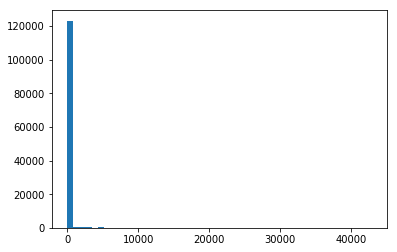

In [18]:
# bins represent the number of "buckets" to group the data in
plt.hist(train_df['duration'].values, bins=50)
plt.show()

- in order to see the effects of `bins`, look at the difference between the previous plot and the following one.

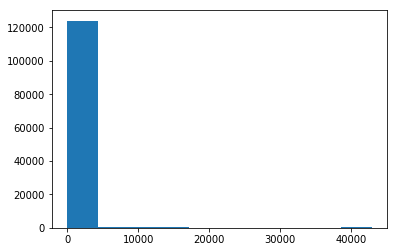

In [19]:
# bins represent the number of "buckets" to group the data in
plt.hist(train_df['duration'].values, bins=10)
plt.show()

- the plot above shows that the distribution is extremely skewed towards 0 (as you could also see from the table above). Anyway, it doesn't say much about the distribution of the other values. But we can do something about that, removing the values that are too close to 0.

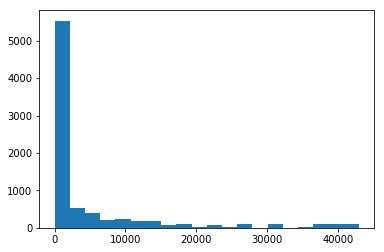

In [20]:
plt.hist(train_df[train_df['duration'] > 1 ]['duration'].values, bins=20)
plt.show()

<div class="alert alert-block alert-danger">
<b>Q: What is the main difference between the two plots above?</b>
</div>

<div class="alert alert-block alert-success">
<b>
In the second one the histogram is plotted only for the elements that have duration > 1.
    
Specifically, <code>train_df[train_df['duration'] > 1 ]</code> returns a dataframe that is obtained from the original one keeping only the rows for which duratio is greater than 1.
</b>
</div>

- Alternatively, we could plot the whole dataset but using a log scale for the y-axis:

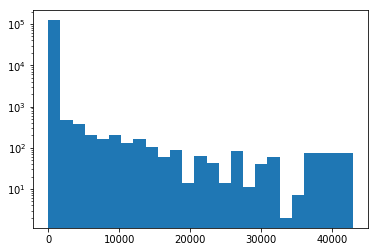

In [21]:
fig, ax = plt.subplots()
ax.hist(train_df['duration'].values, bins=25)
ax.set_yscale('log')
plt.show()

<div class="alert alert-block alert-danger">
<b>Q: Can you see how the scale was set to a logarithmic one?</b>
</div>

<div class="alert alert-block alert-success">
<b>ax.set_yscale('log')
</b>
</div>

#### Using matplotlib in a more readable way

If you want to have a plot which is more readable, you have to use matplotlib a bit differently

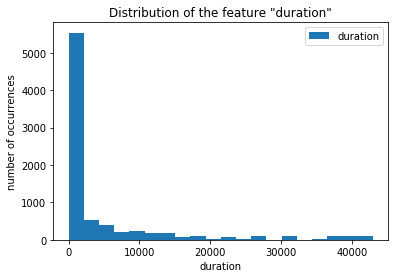

In [22]:
fig, ax = plt.subplots()

ax.hist(train_df[train_df['duration']>1]['duration'].values, bins=20, label='duration')

ax.set_title('Distribution of the feature "duration"')
ax.set_xlabel('duration')
ax.set_ylabel('number of occurrences')
ax.legend()
plt.show()

There aren't any differences about how the data is showed, but there are many differences in the format (labels on the axis, legend, title of the plot).

---

<div class="alert alert-block alert-danger">
<b>Q: Plot the distribution of the feature "src_bytes".</b>
</div>

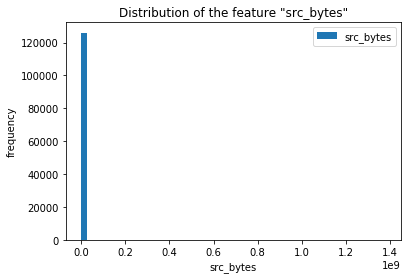

In [23]:
fig, ax = plt.subplots()
ax.hist(train_df['src_bytes'].values, bins=50, label='src_bytes')
ax.set_title('Distribution of the feature "src_bytes"')
ax.set_xlabel('src_bytes')
ax.set_ylabel('frequency')
ax.legend()
plt.show()

<div class="alert alert-block alert-danger">
<b>Q: Print the possible unique values of "protocol_type".</b>
</div>

In [24]:
print(train_df['protocol_type'].unique())

['tcp' 'udp' 'icmp']


<div class="alert alert-block alert-danger">
<b>Q: Now plot the distribution of "src_bytes" separately for each "protocol_type".</b>

Remember, if you want to filter a dataframe df in order to keep the entries that have "protocol_type" equal to 'asd' you can do: <code>df[df['protocol_type']=='asd']</code>
</div>

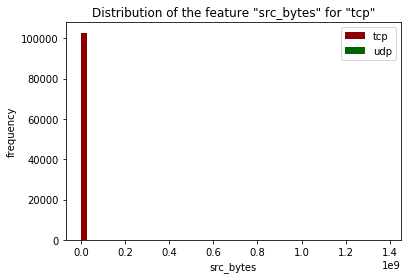

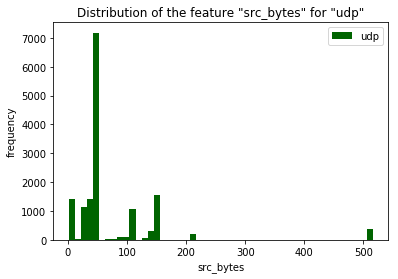

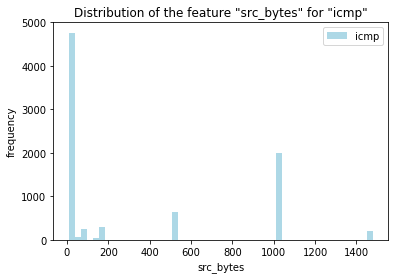

In [25]:
fig, ax = plt.subplots()
ax.hist(
    train_df[train_df['protocol_type']=='tcp']['src_bytes'].values, bins=50, label='tcp', color='darkred'
)
ax.hist(
    train_df[train_df['protocol_type']=='udp']['src_bytes'].values, bins=50, label='udp', color='darkgreen'
)
ax.set_title('Distribution of the feature "src_bytes" for "tcp"')
ax.set_xlabel('src_bytes')
ax.set_ylabel('frequency')
ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.hist(
    train_df[train_df['protocol_type']=='udp']['src_bytes'].values, bins=50, label='udp', color='darkgreen'
)
ax.set_title('Distribution of the feature "src_bytes" for "udp"')
ax.set_xlabel('src_bytes')
ax.set_ylabel('frequency')
ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.hist(
    train_df[train_df['protocol_type']=='icmp']['src_bytes'].values, bins=50, label='icmp', color='lightblue'
)
ax.set_title('Distribution of the feature "src_bytes" for "icmp"')
ax.set_xlabel('src_bytes')
ax.set_ylabel('frequency')
ax.legend()
plt.show()

<div class="alert alert-block alert-danger">
<b>Q: Try to analyse the differences between the distributions of "src_bytes" for each protocol type.</b>
</div>

<div class="alert alert-block alert-success">
<b>Different distributions, different scales, tcp is the most skewed, ...</b>
</div>

---

<div class="alert alert-block alert-danger">
<b>Q: Now do the same as above but for the "dst_bytes". Plot the distribution, the distribution for each protocol type and analyse the differences, if any.</b>
</div>

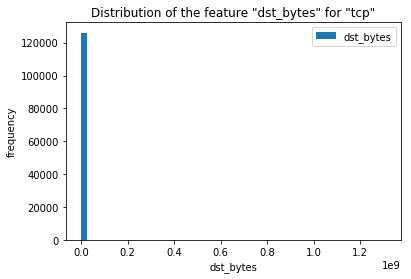

In [26]:
fig, ax = plt.subplots()
ax.hist(train_df['dst_bytes'].values, bins=50, label='dst_bytes')
ax.set_title('Distribution of the feature "dst_bytes" for "tcp"')
ax.set_xlabel('dst_bytes')
ax.set_ylabel('frequency')
ax.legend()
plt.show()

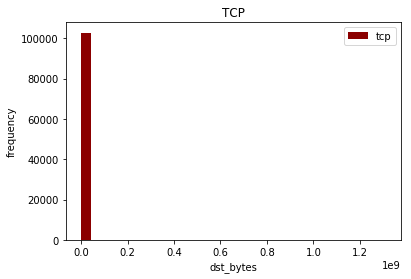

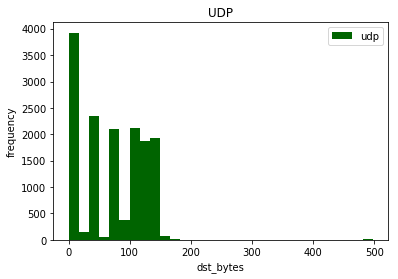

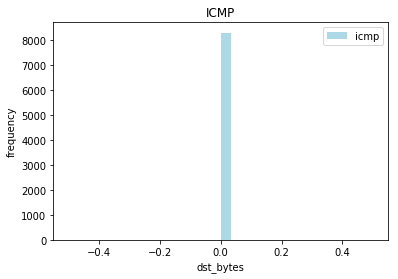

In [27]:
bins=30

fig, ax = plt.subplots()
ax.hist(train_df[train_df['protocol_type']=='tcp']['dst_bytes'].values, bins=bins, label='tcp', color='darkred')
ax.set_title('TCP')
ax.set_xlabel('dst_bytes')
ax.set_ylabel('frequency')
ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.hist(train_df[train_df['protocol_type']=='udp']['dst_bytes'].values, bins=bins, label='udp', color='darkgreen')
ax.set_title('UDP')
ax.set_xlabel('dst_bytes')
ax.set_ylabel('frequency')
ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.hist(
    train_df[train_df['protocol_type']=='icmp']['dst_bytes'].values, bins=bins, label='icmp', color='lightblue'
)
ax.set_title('ICMP')
ax.set_xlabel('dst_bytes')
ax.set_ylabel('frequency')
ax.legend()
plt.show()

<div class="alert alert-block alert-success">
<b>
    
- both TCP and ICMP extremely skewed, but TCP has a much wider support (range in 0 -> 10**9, while ICMP -0.5 -> 0.5). 

- UDP less unbalanced but still the area close to 0 is the most frequent. 

- The "empty spaces" in between the bars in the case of UDP might suggest that this attribute could have only a limited number of possible values.

- etc...

</b>
</div>

---

## Scatter plot

#### Let's analyse whether there is some easily-visible correlation between src_bytes and dst_bytes.</b>

In [28]:
x, y = train_df['src_bytes'].values, train_df['dst_bytes'].values

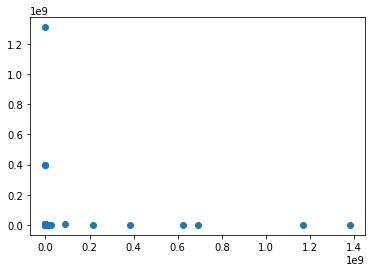

In [29]:
fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()

- most of the points are very close to 0.0 (be careful with the scale of the axis: it is 1e9, which means 10^9 !), let's focus on them

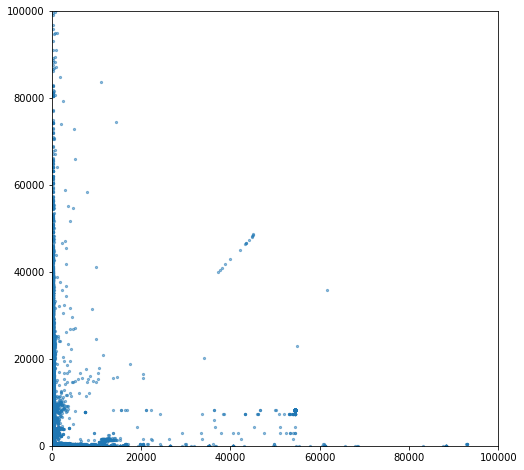

In [30]:
fig, ax = plt.subplots(figsize=(8, 8)) # with figsize you can set the size of the plot
ax.scatter(x, y, s=5, alpha=0.5)

# with set_xlim and set_ylim you can look at only that portion of the whole
ax.set_xlim(0, 10**5)
ax.set_ylim(0, 10**5)

plt.show()

- still a bit too far, probably...

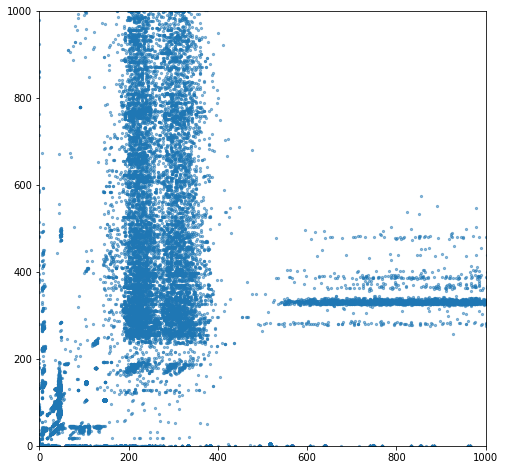

In [31]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x, y, s=5, alpha=0.5)

# with set_xlim and set_ylim you can look at only that portion of the whole
ax.set_xlim(0, 10**3)
ax.set_ylim(0, 10**3)

plt.show()

- It looks like there are different "groups". We can use different colours for the points depending on some attributes. For instance, let's assume we want to have different colours depending on the protocol type. We can create a new list containing the colours of each point.

In [32]:
colors = []
for protocol in train_df['protocol_type'].values:
    if protocol == 'tcp':
        colors.append('darkred')
    elif protocol == 'udp':
        colors.append('darkgreen')
    elif protocol == 'icmp':
        colors.append('lightblue')

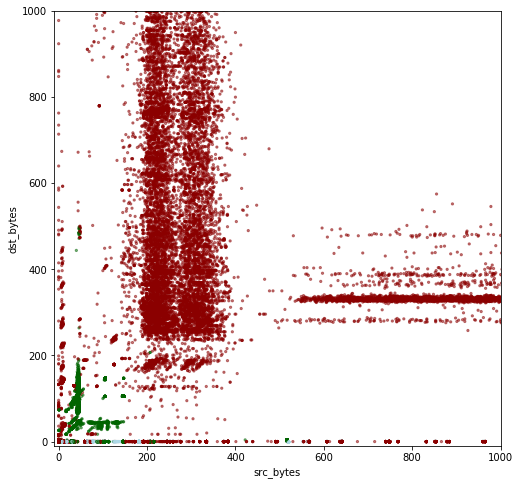

In [33]:
fig, ax = plt.subplots(figsize=(8, 8))

# with c you can set the color. 
# It can be a single color for the whole scatter or a list containing the color of each point
# alpha let's us choose how transparent the plot should be
ax.scatter(x, y, s=5, alpha=0.5, c=colors)

ax.set_xlim(-10, 10**3)
ax.set_ylim(-10, 10**3)

ax.set_xlabel('src_bytes')
ax.set_ylabel('dst_bytes')

plt.show()

- this plot, with different colours, gives a different insight into the data!

<div class="alert alert-block alert-danger">
<b>Q: The scatter plots above do not suggest any easily-visible correlation between dst_bytes and src_bytes. If you think about it, this makes very much sense; why?</b>
    
\[hint: think about the type of data we are looking at!\]
</div>

<div class="alert alert-block alert-success">
<b>In the network we may have different types of interactions, and the number of exchanged bytes (both src and dest) might depend on the type of interaction.</b>
</div>

---

<div class="alert alert-block alert-danger">
<b>Q: Try to see if there is any correlation between the "duration" and the "src_bytes"</b>. 
    
\[HINT: as before, try to focus on specific areas and possibly use different colours\]
</div>

In [34]:
x = train_df['duration'].values
y = train_df['src_bytes'].values

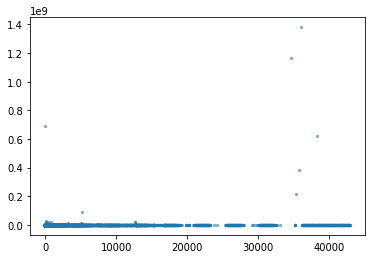

In [35]:
fig, ax = plt.subplots()
ax.scatter(x, y, s=5, alpha=0.5)
plt.show()

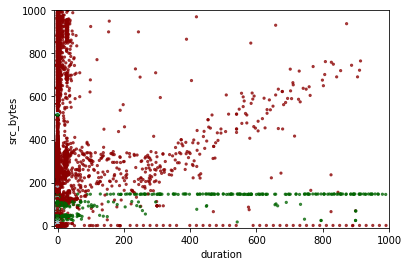

In [36]:
fig, ax = plt.subplots()
ax.scatter(x, y, s=5, alpha=0.7, c=colors)
ax.set_xlim(-10, 10**3)
ax.set_ylim(-10, 10**3)
ax.set_xlabel('duration')
ax.set_ylabel('src_bytes')
plt.show()

<div class="alert alert-block alert-danger">
<b>Q: Try to see if there is any correlation between the "duration" and the "dst_bytes"</b>.
</div>

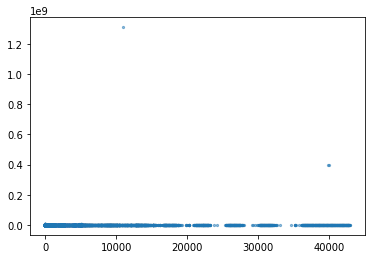

In [37]:
fig, ax = plt.subplots()
ax.scatter(train_df['duration'].values, train_df['dst_bytes'].values, s=5, alpha=0.5)
plt.show()

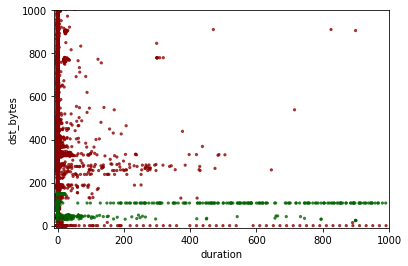

In [38]:
fig, ax = plt.subplots()
ax.scatter(train_df['duration'].values, train_df['dst_bytes'].values, s=5, alpha=0.7, c=colors)
ax.set_xlim(-10, 10**3)
ax.set_ylim(-10, 10**3)
ax.set_xlabel('duration')
ax.set_ylabel('dst_bytes')
plt.show()

---

## bar plot

#### Let's display, for the 10 most common services, the number of occurrences.

In [39]:
groupedby_df = train_df.groupby('service').size().reset_index().sort_values(0, ascending=False)
service_list = groupedby_df['service'][:10].values
count_list = groupedby_df[0][:10].values

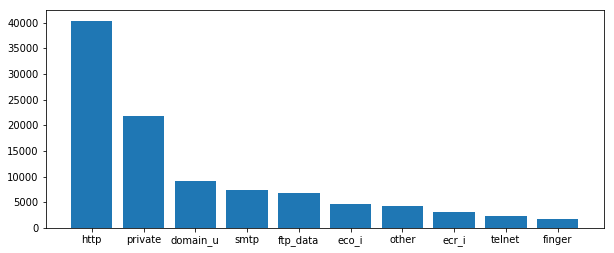

In [40]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.bar(service_list, count_list)

plt.show()

<div class="alert alert-block alert-danger">
<b>Q: Plot, for the 10 LEAST common services, the number of occurrences.</b>
</div>

In [41]:
service_list = groupedby_df['service'].values[-10:]
count_list = groupedby_df[0].values[-10:]

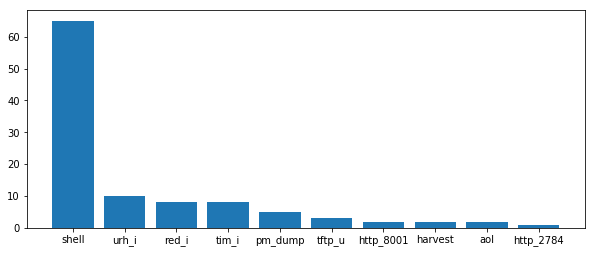

In [42]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.bar(service_list, count_list)
plt.show()

---

<div class="alert alert-block alert-danger">
<b>Q: Plot the number of occurrences of each protocol.</b>
</div>

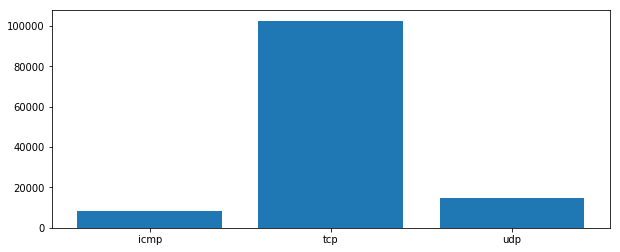

In [43]:
groupedby_df = train_df.groupby('protocol_type').size().reset_index()

fig, ax = plt.subplots(figsize=(10, 4))
ax.bar(groupedby_df['protocol_type'].values, groupedby_df[0].values)
plt.show()

---

# Some more visualizations

<div class="alert alert-block alert-danger">
<b>Q: Plot the number of occurrences of each possible "urgent" value</b>
</div>

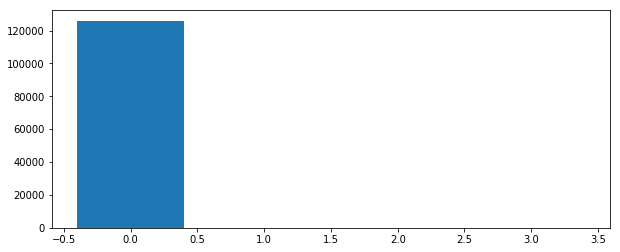

In [44]:
groupedby_df = train_df.groupby('urgent').size().reset_index()

fig, ax = plt.subplots(figsize=(10, 4))
ax.bar(groupedby_df['urgent'].values, groupedby_df[0].values)
plt.show()

In [45]:
groupedby_df

,urgent,0
0,0,125964
1,1,5
2,2,3
3,3,1


---

<div class="alert alert-block alert-danger">
<b>Q: Plot the number of occurrences of the most frequent "flag" values</b>
</div>

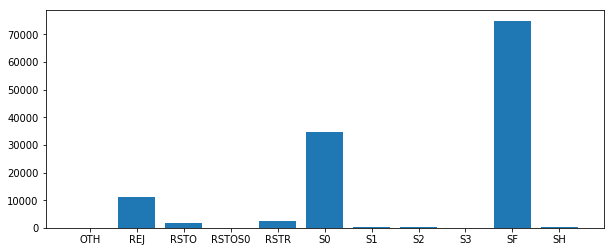

In [46]:
groupedby_df = train_df.groupby('flag').size().reset_index()

fig, ax = plt.subplots(figsize=(10, 4))
ax.bar(groupedby_df['flag'].values, groupedby_df[0].values)
plt.show()

---

<div class="alert alert-block alert-danger">
<b>Q: Try to see if there is any visible correlation between "same_srv_rate" and "diff_srv_rate"</b>
</div>

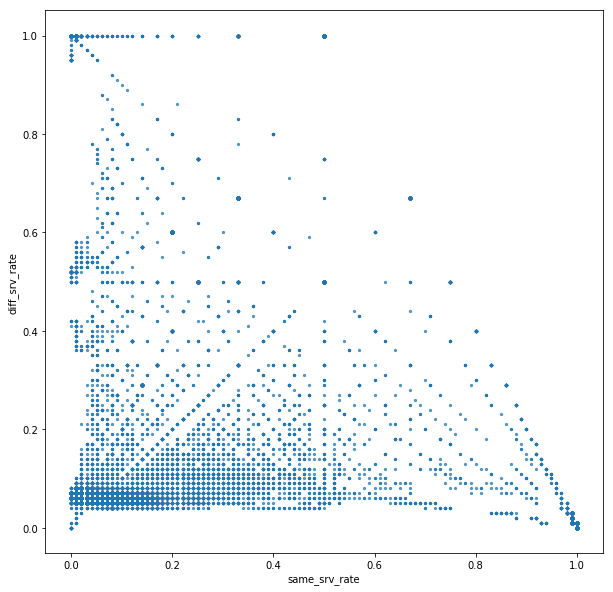

In [47]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(train_df['same_srv_rate'].values, train_df['diff_srv_rate'].values, s=5, alpha=0.7)
ax.set_xlabel('same_srv_rate')
ax.set_ylabel('diff_srv_rate')
plt.show()

This one is very interesting as it suggests that they always assume specific values, due to how they are generated (srv_rate suggests that they are computed as rates between some other attributes...)

---

# Clustering

In this session we will have a look only at the K-Means algorithm. In the next sessions, we will focus a bit more on clustering. 

In [48]:
from sklearn.cluster import KMeans

In order to be able to perform clustering, we have to perform the usual preprocessing of the data:
- one hot encoding
- scaling

In [49]:
col_names = np.array(headers)

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 20, 21]
numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

In [50]:
print("Nominal cols:\n", nominal_cols, "\n")
print("Binary cols:\n", binary_cols, "\n")
print("numeric_cols:\n", numeric_cols, "\n")

Nominal cols:
 ['protocol_type', 'service', 'flag'] 

Binary cols:
 ['land', 'logged_in', 'root_shell', 'su_attempted', 'is_host_login', 'is_guest_login'] 

numeric_cols:
 ['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'] 



---

Some of the clustering algorithms tend to be intractable on small machines as the dimensionality increases.
Thus, in order to (hopefully) avoid problems on your machine, I remove here the 'service' column, which is a categorical one and increases a lot the dimensionality of the dataset

In [51]:
train_df = train_df.drop('service', axis=1)
nominal_cols = [x for x in nominal_cols if x != 'service']

---

<div class="alert alert-block alert-danger">
<b>Q: Perform one hot encoding of the nominal cols</b>
</div>

In [52]:
train_df = pd.get_dummies(train_df, columns=nominal_cols)

---

<div class="alert alert-block alert-danger">
<b>Q: Perform scaling with the StandardScaler</b>
</div>

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
standard_scaler = StandardScaler().fit(train_df[numeric_cols])
train_df[numeric_cols] = standard_scaler.transform(train_df[numeric_cols])

/home/luca/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/luca/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


---

# Let's perform the actual clustering

While performing clustering, we do not want information about the label, since it is information that is missing in unseen data (it is the target label).
So we will fit the clustering model on the dataframe after dropping such columns, as in:
```
    train_df.drop(['class', 'attack_type', 'difficulty_level'], axis=1)
```

## K-MEANS

- training the clustering algorithm

In [55]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(
    train_df.drop(['class', 'attack_type', 'difficulty_level'], axis=1)
)

- you can print the centers of the clusters (which are, in this case, two 52-D points) 

In [56]:
kmeans.cluster_centers_

array([[ 4.22227114e-02,  1.66788479e-03,  1.87554983e-03,
         2.08690304e-04,  3.43314357e-02,  2.96790806e-03,
         3.63275944e-02,  1.01245022e-02,  5.46669742e-01,
         4.36556677e-03,  1.82329423e-03,  1.46083213e-03,
         4.63766817e-03,  8.63676020e-03,  7.13968048e-03,
         1.54828957e-02,  0.00000000e+00,  1.09837002e-05,
         1.30376521e-02, -2.86531982e-01,  8.88726648e-02,
        -6.10623998e-01, -6.12767419e-01,  1.38695179e-01,
         1.42034799e-01,  4.76044134e-01, -3.07864052e-02,
         1.40880114e-01, -2.50796810e-01,  3.49905415e-01,
         3.90546008e-01,  1.53190296e-02,  1.70182611e-01,
         1.07828032e-01, -6.09119327e-01, -6.15294786e-01,
         1.44323577e-01,  1.43126549e-01,  9.10548746e-02,
         7.44266509e-01,  1.64678617e-01,  5.05250209e-04,
         1.23379904e-01,  1.71455560e-02,  2.52625104e-04,
         2.65915382e-02,  4.10790387e-03,  3.29511006e-03,
         1.35099512e-03,  4.94266509e-04,  8.22810949e-0

- if you want, you can print the labels for the elements in DF

In [57]:
kmeans.labels_

array([0, 0, 1, ..., 0, 1, 0], dtype=int32)

- let's save those labels in a new column of the dataframe

In [58]:
train_df['cluster'] = kmeans.labels_

<div class="alert alert-block alert-danger">
<b>Q: In this case, we know the ground truth (i.e. the attack_type). Try to evaluate the accuracy of clustering by looking at the attack types of the entries of each cluster.</b>
</div>

e.g. after a perfect clustering, I'd have in each cluster only elements belonging to one attack_type

In [60]:
train_df.groupby(['cluster', 'attack_type']).size().reset_index().sort_values(['cluster', 'attack_type'])

,cluster,attack_type,0
0,0,benign,67236
1,0,dos,11604
2,0,probe,11160
3,0,r2l,992
4,0,u2r,52
5,1,benign,107
6,1,dos,34323
7,1,probe,496
8,1,r2l,3


---